### Reading,displaying and writing images

In [1]:
import tifffile as tf

d0 = r'./ExampleHuman/images/AS_09125_050116030001_D03f00d0.tif'
nuc = tf.imread(d0)

stacks = r'./ExampleHuman/images/cells.tif'
cells = tf.imread(stacks)

In [2]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(2.5, 2.5))
plt.imshow(cells[0,:,:], cmap="gray")
plt.show()

In [3]:

tf.imsave('./ExampleHuman/images/AS_09125_050116030001_D03f00d0_copy.tif', nuc)

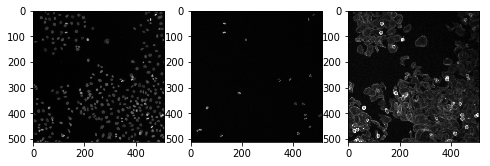

In [4]:
#plt.imshow(cells[2,:,:])
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 1
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cells[i-1,:,:],cmap="gray")
plt.show()

### Image data representation

<type 'numpy.ndarray'>
(512, 512)
(3, 512, 512)
[[8 8 8 8 8 8]
 [8 8 7 8 8 7]
 [9 8 8 8 8 8]]


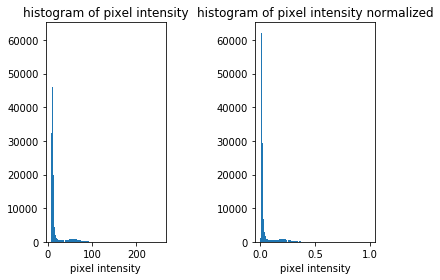

7 255
0.0 1.0


In [5]:
import numpy as np
print type(nuc)
print nuc.shape
print cells.shape
print nuc[0:3,0:6]

nuc_norm = np.interp(nuc, (nuc.min(), nuc.max()), (0,1))

fig, axes = plt.subplots(ncols=2)
ax0, ax1 = axes.flatten()
ax0.hist(nuc.ravel(), bins=256)
ax0.set_title("histogram of pixel intensity")
ax0.set_xlabel("pixel intensity")
ax1.hist(nuc_norm.ravel(), bins=256)
ax1.set_title("histogram of pixel intensity normalized")
ax1.set_xlabel("pixel intensity")
fig.tight_layout(w_pad=4)
plt.show()

print nuc.min(), nuc.max()
print nuc_norm.min(), nuc_norm.max()

### Color management

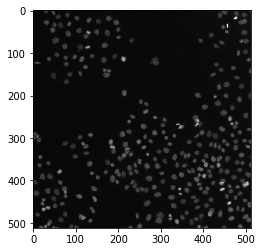

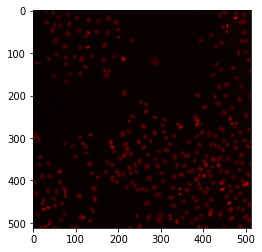

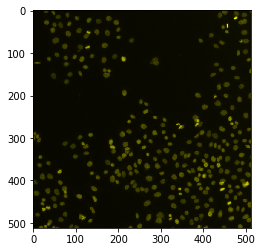

In [6]:
from skimage.color import gray2rgb
from skimage import img_as_float

rgb_nuc = gray2rgb(nuc)
plt.imshow(rgb_nuc)
plt.show()

# red channel
red = [1,0,0]
r_nuc = img_as_float(rgb_nuc) * red
plt.imshow(r_nuc)
plt.show()

# yellow channel
red = [1,1,0]
r_nuc = img_as_float(rgb_nuc) * red
plt.imshow(r_nuc)
plt.show()

### Manipulating images

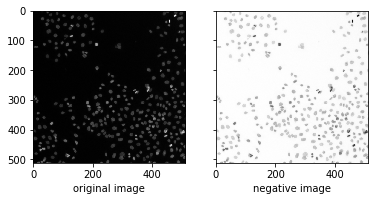

In [7]:
nuc_neg = nuc.max() - nuc
fig, axes = plt.subplots(ncols=2)
ax0, ax1 = axes.flatten()
ax0.imshow(nuc, cmap='gray')
ax0.set_xlabel("original image")
ax1.imshow(nuc_neg, cmap='gray')
ax1.set_xlabel("negative image")
plt.setp(ax1.get_yticklabels(), visible=False)
plt.show()

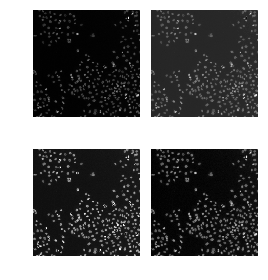

In [8]:
bright_nuc = nuc + 30
contrast_nuc = nuc * 2
gamma_nuc = nuc ** 0.5

fig, axes = plt.subplots(ncols=2, nrows=2)
ax0, ax1, ax2, ax3 = axes.flatten()
ax0.imshow(nuc, cmap='gray')
ax1.imshow(bright_nuc, cmap='gray')
ax2.imshow(contrast_nuc, cmap='gray')
ax3.imshow(gamma_nuc, cmap='gray')
ax0.axis('off')
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
fig.tight_layout(w_pad=-15)
plt.show()

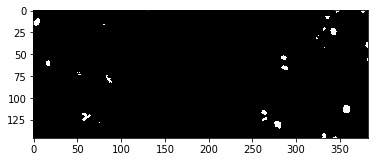

[[False False False ...  True  True False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [9]:
img_crop = nuc[366:512,58:441]
img_thresh = img_crop > 100
plt.imshow(img_thresh, cmap='gray')
plt.show()
print img_thresh

### spatial transformation

/home/cedric/anaconda3/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


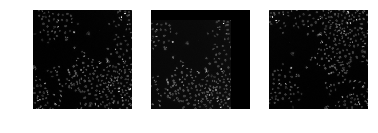

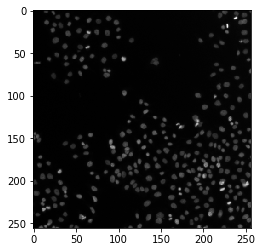

In [10]:
from skimage import transform as trf

translate = trf.SimilarityTransform(translation=(100,-50))

translated = trf.warp(nuc, translate)
rotated = trf.rotate(nuc, angle=90)
resized = trf.resize(nuc, (256,256))

fig, ax = plt.subplots(ncols=3)

ax[0].imshow(nuc, cmap=plt.cm.gray)
ax[1].imshow(translated, cmap=plt.cm.gray)
ax[2].imshow(rotated, cmap=plt.cm.gray)

for a in ax:
    a.axis('off')
plt.show()

plt.imshow(resized, cmap=plt.cm.gray)
plt.show()

### Cell segmentation

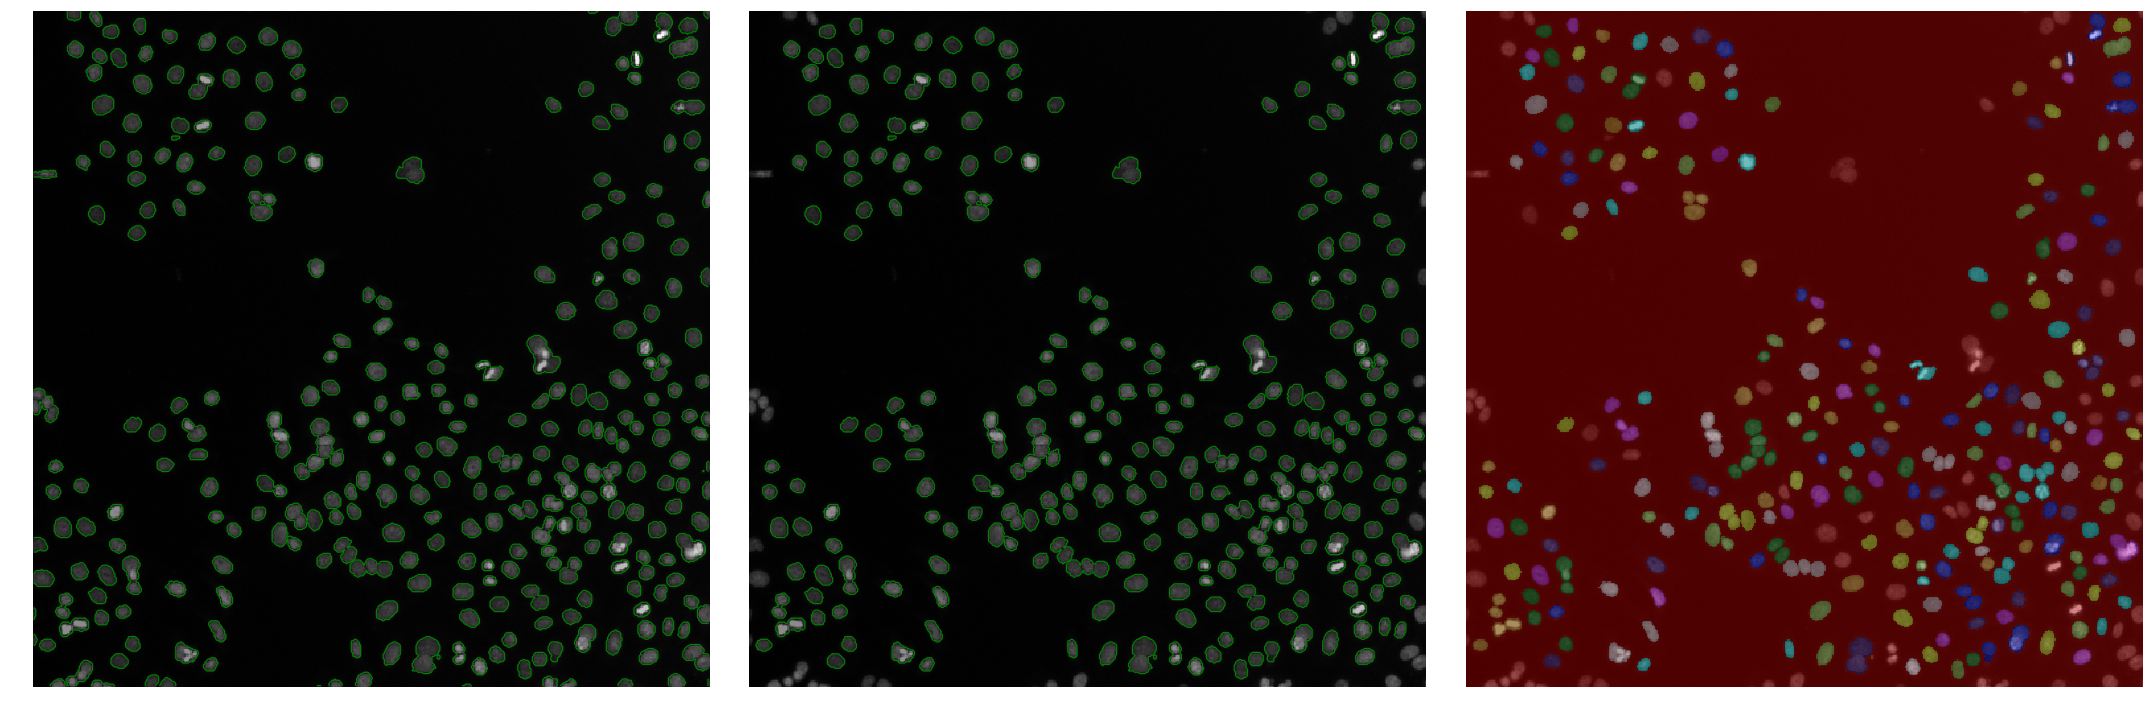

In [57]:
## global strategy for nuclei
# li thresholding

from scipy import ndimage as ndi
from skimage.filters import threshold_li
from skimage.color import label2rgb
from skimage.segmentation import clear_border


thresh_nuc = threshold_li(nuc_norm)
binary_nuc = nuc_norm > thresh_nuc

#discard nuclei touching border
nuc_cleaned = clear_border(binary_nuc)

#label and display nuclei
labeled_nuc, count_nuc = ndi.label(nuc_cleaned)
image_label_overlay = label2rgb(labeled_nuc, image=nuc_norm)

fig, axes = plt.subplots(ncols=3, figsize=(30, 30))
axes[0].imshow(nuc_norm, cmap='gray')
axes[0].contour(binary_nuc, [0.5], linewidths=1.2, colors='g')
axes[1].imshow(nuc_norm, cmap='gray')
axes[1].contour(nuc_cleaned, [0.5], linewidths=1.2, colors='g')
axes[2].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()